In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from highlight_text import fig_text, ax_text
from PIL import Image
import urllib
import seaborn as sns
from sqlalchemy import create_engine, text

In [2]:
# Database connection parameters
server_name = 'DESKTOP-F00PL4B\\SQLEXPRESS01'  # Double backslash to escape
database_name = 'PortfolioProject'

connection_url = f"mssql+pyodbc://@{server_name}/{database_name}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"

engine = create_engine(connection_url)

with engine.connect() as connection:
    query_results = text("SELECT * FROM WC_Results2324")
    query_hills = text("SELECT * FROM WC_Calendar2324")
    df_results = pd.read_sql(query_results,connection)
    df_hills = pd.read_sql(query_hills, connection)

In [3]:
df_results.head()

,Result_ID,WC_ID,Standing_ID,Miasto,Miejsce,Zawodnik,Kraj,Skok_1,Skok_2,Skok_3,Nota
0,1,1,1.0,Ruka,1.0,KRAFT Stefan,AUT,144.0,143.0,NaN,326.2
1,2,1,10.0,Ruka,2.0,PASCHKE Pius,DEU,142.0,142.5,NaN,315.6
2,3,1,23.0,Ruka,3.0,LEYHE Stephan,DEU,137.0,143.5,NaN,313.2
3,4,1,3.0,Ruka,4.0,WELLINGER Andreas,DEU,142.0,136.0,NaN,311.5
4,5,1,11.0,Ruka,5.0,TSCHOFENIG Daniel,AUT,136.0,140.5,NaN,310.3


In [4]:
df_hills.head()

,ID,WC_Date,Miasto,K_Point,HS_Point,Zawody
0,1,2023-11-25,Ruka,120,142,indywidualne
1,2,2023-11-26,Ruka,120,142,indywidualne
2,3,2023-12-02,Lillehammer,90,98,indywidualne
3,4,2023-12-03,Lillehammer,123,140,indywidualne
4,5,2023-12-09,Klingenthal,125,140,indywidualne


In [5]:
df_hills = df_hills.loc[:,["ID","Miasto","K_Point","HS_Point"]]

In [6]:
df = df_results.merge(df_hills,left_on="WC_ID", right_on="ID", how="left",suffixes=("_res","_cal"))

In [7]:
df.head()

,Result_ID,WC_ID,Standing_ID,Miasto_res,Miejsce,Zawodnik,Kraj,Skok_1,Skok_2,Skok_3,Nota,ID,Miasto_cal,K_Point,HS_Point
0,1,1,1.0,Ruka,1.0,KRAFT Stefan,AUT,144.0,143.0,NaN,326.2,1,Ruka,120,142
1,2,1,10.0,Ruka,2.0,PASCHKE Pius,DEU,142.0,142.5,NaN,315.6,1,Ruka,120,142
2,3,1,23.0,Ruka,3.0,LEYHE Stephan,DEU,137.0,143.5,NaN,313.2,1,Ruka,120,142
3,4,1,3.0,Ruka,4.0,WELLINGER Andreas,DEU,142.0,136.0,NaN,311.5,1,Ruka,120,142
4,5,1,11.0,Ruka,5.0,TSCHOFENIG Daniel,AUT,136.0,140.5,NaN,310.3,1,Ruka,120,142


In [8]:
df = df.loc[:,["WC_ID","Miasto_res","Skok_1","Skok_2","Skok_3","K_Point","HS_Point"]]

In [9]:
df

,WC_ID,Miasto_res,Skok_1,Skok_2,Skok_3,K_Point,HS_Point
0,1,Ruka,144.0,143.0,NaN,120,142
1,1,Ruka,142.0,142.5,NaN,120,142
2,1,Ruka,137.0,143.5,NaN,120,142
3,1,Ruka,142.0,136.0,NaN,120,142
4,1,Ruka,136.0,140.5,NaN,120,142
...,...,...,...,...,...,...,...
1517,32,Planica,213.0,199.5,NaN,200,240
1518,32,Planica,199.0,200.5,NaN,200,240
1519,32,Planica,193.0,186.5,NaN,200,240
1520,32,Planica,194.0,187.5,NaN,200,240


In [10]:
df_melted = df.melt(
    id_vars=["WC_ID","Miasto_res", "K_Point","HS_Point"],
    value_vars=["Skok_1", "Skok_2", "Skok_3"],
    var_name="Skok_nr",
    value_name="Dlugosc_skoku"
)

In [11]:
df_melted

,WC_ID,Miasto_res,K_Point,HS_Point,Skok_nr,Dlugosc_skoku
0,1,Ruka,120,142,Skok_1,144.0
1,1,Ruka,120,142,Skok_1,142.0
2,1,Ruka,120,142,Skok_1,137.0
3,1,Ruka,120,142,Skok_1,142.0
4,1,Ruka,120,142,Skok_1,136.0
...,...,...,...,...,...,...
4561,32,Planica,200,240,Skok_3,NaN
4562,32,Planica,200,240,Skok_3,NaN
4563,32,Planica,200,240,Skok_3,NaN
4564,32,Planica,200,240,Skok_3,NaN


In [12]:
df_melted = df_melted.loc[df_melted["Dlugosc_skoku"] != 0]

In [13]:
df_jumps = df_melted.dropna(subset=["Dlugosc_skoku"], how="any", axis=0)

In [14]:
df_jumps

,WC_ID,Miasto_res,K_Point,HS_Point,Skok_nr,Dlugosc_skoku
0,1,Ruka,120,142,Skok_1,144.0
1,1,Ruka,120,142,Skok_1,142.0
2,1,Ruka,120,142,Skok_1,137.0
3,1,Ruka,120,142,Skok_1,142.0
4,1,Ruka,120,142,Skok_1,136.0
...,...,...,...,...,...,...
4470,30,Vikersund_2,200,240,Skok_3,227.0
4471,30,Vikersund_2,200,240,Skok_3,220.0
4472,30,Vikersund_2,200,240,Skok_3,233.0
4473,30,Vikersund_2,200,240,Skok_3,228.0


In [15]:
df_jumps_city = df_jumps

In [16]:
df_pc = df_jumps_city.melt(id_vars=["WC_ID","Miasto_res","Dlugosc_skoku"],value_vars=["K_Point","HS_Point"],value_name="Point_length",var_name="Point_type")

In [17]:
df_pc

,WC_ID,Miasto_res,Dlugosc_skoku,Point_type,Point_length
0,1,Ruka,144.0,K_Point,120
1,1,Ruka,142.0,K_Point,120
2,1,Ruka,137.0,K_Point,120
3,1,Ruka,142.0,K_Point,120
4,1,Ruka,136.0,K_Point,120
...,...,...,...,...,...
4831,30,Vikersund_2,227.0,HS_Point,240
4832,30,Vikersund_2,220.0,HS_Point,240
4833,30,Vikersund_2,233.0,HS_Point,240
4834,30,Vikersund_2,228.0,HS_Point,240


In [18]:
df_pc['IsAbove'] = (df_pc['Dlugosc_skoku'] > df_pc['Point_length']).astype(int)

In [19]:
df_pc

,WC_ID,Miasto_res,Dlugosc_skoku,Point_type,Point_length,IsAbove
0,1,Ruka,144.0,K_Point,120,1
1,1,Ruka,142.0,K_Point,120,1
2,1,Ruka,137.0,K_Point,120,1
3,1,Ruka,142.0,K_Point,120,1
4,1,Ruka,136.0,K_Point,120,1
...,...,...,...,...,...,...
4831,30,Vikersund_2,227.0,HS_Point,240,0
4832,30,Vikersund_2,220.0,HS_Point,240,0
4833,30,Vikersund_2,233.0,HS_Point,240,0
4834,30,Vikersund_2,228.0,HS_Point,240,0


In [20]:
Above_count=np.round((df_pc.loc[(df_pc["Point_type"] == "K_Point") & (df_pc['IsAbove']==1),"IsAbove"]).sum()/df_pc.loc[df_pc["Point_type"] == "K_Point","IsAbove"].count(),2)
Under_count=np.round((df_pc.loc[(df_pc["Point_type"] == "K_Point") & (df_pc['IsAbove']==0),"IsAbove"].count()).sum()/df_pc.loc[df_pc["Point_type"] == "K_Point","IsAbove"].count(),2)

In [21]:
df_total = pd.DataFrame(data=[["Konkursy PŚ Razem",Above_count,Under_count]],
                        columns=["World_Cup_no","Above_count","Under_count"])

In [22]:
df_total.set_index("World_Cup_no",inplace=True)

In [23]:
df_total

,Above_count,Under_count
World_Cup_no,,
Konkursy PŚ Razem,0.68,0.32


In [24]:
df_au = df_pc.groupby(["WC_ID","Miasto_res","Point_type"])['IsAbove'].agg(
    Above_count=lambda x: np.round((x==1).sum()/x.count(),2),
    Under_count=lambda x: np.round((x==0).sum()/x.count(),2),
).reset_index()

In [25]:
df_au

,WC_ID,Miasto_res,Point_type,Above_count,Under_count
0,1,Ruka,HS_Point,0.09,0.91
1,1,Ruka,K_Point,0.76,0.24
2,2,Ruka,HS_Point,0.18,0.82
3,2,Ruka,K_Point,0.89,0.11
4,3,Lillehammer,HS_Point,0.06,0.94
...,...,...,...,...,...
59,30,Vikersund_2,K_Point,0.62,0.38
60,31,Planica,HS_Point,0.00,1.00
61,31,Planica,K_Point,0.88,0.12
62,32,Planica,HS_Point,0.03,0.97


In [26]:
df_auk = df_au.loc[df_au["Point_type"]=="K_Point"]

In [ ]:
df_auk["Miasto_res"] = df_auk["Miasto_res"].str.replace("Vikersund_1","Vikersund")
df_auk["Miasto_res"] = df_auk["Miasto_res"].str.replace("Vikersund_2","Vikersund")

C:\Users\Paweł\AppData\Local\Temp\ipykernel_34620\2674328713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_auk["Miasto_res"] = df_auk["Miasto_res"].str.replace("Vikersund_1","Vikersund")
C:\Users\Paweł\AppData\Local\Temp\ipykernel_34620\2674328713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_auk["Miasto_res"] = df_auk["Miasto_res"].str.replace("Vikersund_2","Vikersund")


In [32]:
df_auk

,WC_ID,Miasto_res,Point_type,Above_count,Under_count
1,1,Ruka,K_Point,0.76,0.24
3,2,Ruka,K_Point,0.89,0.11
5,3,Lillehammer,K_Point,0.68,0.32
7,4,Lillehammer,K_Point,0.53,0.47
9,5,Klingenthal,K_Point,0.62,0.38
11,6,Klingenthal,K_Point,0.80,0.20
13,7,Engelberg,K_Point,0.68,0.32
15,8,Engelberg,K_Point,0.79,0.21
17,9,Oberstdorf,K_Point,0.63,0.37
19,10,Garmisch-Partenkirchen,K_Point,0.79,0.21


In [33]:
df_auk["World_Cup_no"] = df_auk['WC_ID'].astype(str) + " " + df_auk["Miasto_res"]

C:\Users\Paweł\AppData\Local\Temp\ipykernel_34620\3474493530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_auk["World_Cup_no"] = df_auk['WC_ID'].astype(str) + " " + df_auk["Miasto_res"]


In [34]:
df_wck = df_auk.loc[:,["World_Cup_no","Above_count","Under_count"]]

In [35]:
df_wck.set_index(["World_Cup_no"],inplace=True)

In [36]:
df_wck

,Above_count,Under_count
World_Cup_no,,
1 Ruka,0.76,0.24
2 Ruka,0.89,0.11
3 Lillehammer,0.68,0.32
4 Lillehammer,0.53,0.47
5 Klingenthal,0.62,0.38
6 Klingenthal,0.80,0.20
7 Engelberg,0.68,0.32
8 Engelberg,0.79,0.21
9 Oberstdorf,0.63,0.37


In [37]:
df_ktotal = pd.concat([df_wck,df_total],axis=0)

In [38]:
df_ktotal

,Above_count,Under_count
World_Cup_no,,
1 Ruka,0.76,0.24
2 Ruka,0.89,0.11
3 Lillehammer,0.68,0.32
4 Lillehammer,0.53,0.47
5 Klingenthal,0.62,0.38
6 Klingenthal,0.80,0.20
7 Engelberg,0.68,0.32
8 Engelberg,0.79,0.21
9 Oberstdorf,0.63,0.37


In [57]:
def plot_horizontal_bar_chart_multiindex(df):
    """
    Creates a horizontal stacked bar chart for a multiindex dataframe with specific colors.
    """
    # Define the colors for each column
    column_colors = {
        'Above_count': '#ff905c',  # Color for Above_count
        'Under_count': '#5d8eaf'  # Color for Under_count
    }

    labels = df.index.tolist()
    data = df.values
    data_cum = data.cumsum(axis=1)

    #plt.rcParams['grid.linestyle'] = '--'
    #plt.rcParams['grid.color'] = "#B2B2B2"
    #plt.rcParams['axes.grid'] = True

    fig, ax = plt.subplots(figsize=(15, 10), facecolor="#EEE9E6", dpi=200)
    # Set background color for the plot area
    ax.set_facecolor('#EEE9E5')
    ax.invert_yaxis()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.grid(False)
    ax.grid(axis='x', linestyle='--', color="#B2B2B2", zorder=0)
    
    # Bold x-axis tick labels
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')  # Set font weight to bold

    # Adjust bar height and spacing
    #bar_height = 1  # Adjusted bar height
    #y_positions = np.arange(len(labels)) * (bar_height + 0.2)  # Add spacing between bars
    bar_height = 1.25  # Height of each individual bar
    group_spacing = 2.4  # Space between groups (y-tick labels)
    y_positions = np.arange(len(labels)) * group_spacing  # Adjusted positions for groups


    ax.set_yticks(y_positions)
    ax.set_yticklabels(labels,weight="bold")

    for i, colname in enumerate(df.columns):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(y_positions, widths, left=starts, height=bar_height,
                        label=colname, color=column_colors[colname],alpha=0.95,zorder=2)  # Use specific colors

        # Add labels to the bars
        for rect in rects:
            width = rect.get_width()
            if width > 0:  # Only label bars with a positive width
                ax.text(
                    rect.get_x() + width / 2,  # X position (center of the bar)
                    rect.get_y() + rect.get_height()/2,  # Y position (center of the bar)
                    f"{width:.00%}",  # Label text
                    ha="center", va="center", color='w', fontsize=9, fontweight='bold'  # Font size and color
                )
        
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0%}"))

    # Add top margin
    margin_ax = fig.add_axes([0,1,0.02,0.02])
    margin = margin_ax.patch
    margin.set_facecolor("#EEE9E6")

    margin_ax.spines["top"].set_visible(False)
    margin_ax.spines["bottom"].set_visible(False)
    margin_ax.spines["left"].set_visible(False)
    margin_ax.spines["right"].set_visible(False)

    margin_ax.xaxis.set_ticks([])
    margin_ax.yaxis.set_ticks([])
    
    bbox_pad = 1.5
    bboxprops = {'linewidth': 0, 'pad': bbox_pad}

    fig_text(
    x=0.15, y=.96, 
    s='Puchar Świata w Skokach Narciarskich 2023/2024: Punkt K - granica sukcesu?',
    va='bottom', ha='left',
    fontsize=19, color='black', font='DM Sans', weight='bold'
    )
    fig_text(
	x=0.15, y=.908, 
    s='Procentowy udział skoków <POWYŻEJ> oraz <PONIŻEJ> punktu K w konkursach PŚ, determinuje poziom sportowy danego konkursu, \njego widowiskowość oraz panujące warunki wietrzne. | viz by Paweł Jaszczerski',
	va='bottom', ha='left',
	fontsize=13, color='#4E616C', font='Karla',
    highlight_textprops=[
        {'color': 'w', 'fontweight': 'bold', 'bbox': {'facecolor':'#ff905c', **bboxprops}},
        {'color': 'w', 'fontweight': 'bold', 'bbox': {'facecolor':'#5d8eaf', **bboxprops}}
    ]
    )
    fotmob_url = 'I:/Projects/Skoki Narciarskie Sezon 2023_2024/FIS_Ski.png'
    logo_ax = fig.add_axes(
    [0.02, .89, .12, .12]
    )
    club_icon = Image.open(fotmob_url)
    logo_ax.imshow(club_icon)
    logo_ax.axis('off')

    return fig, ax

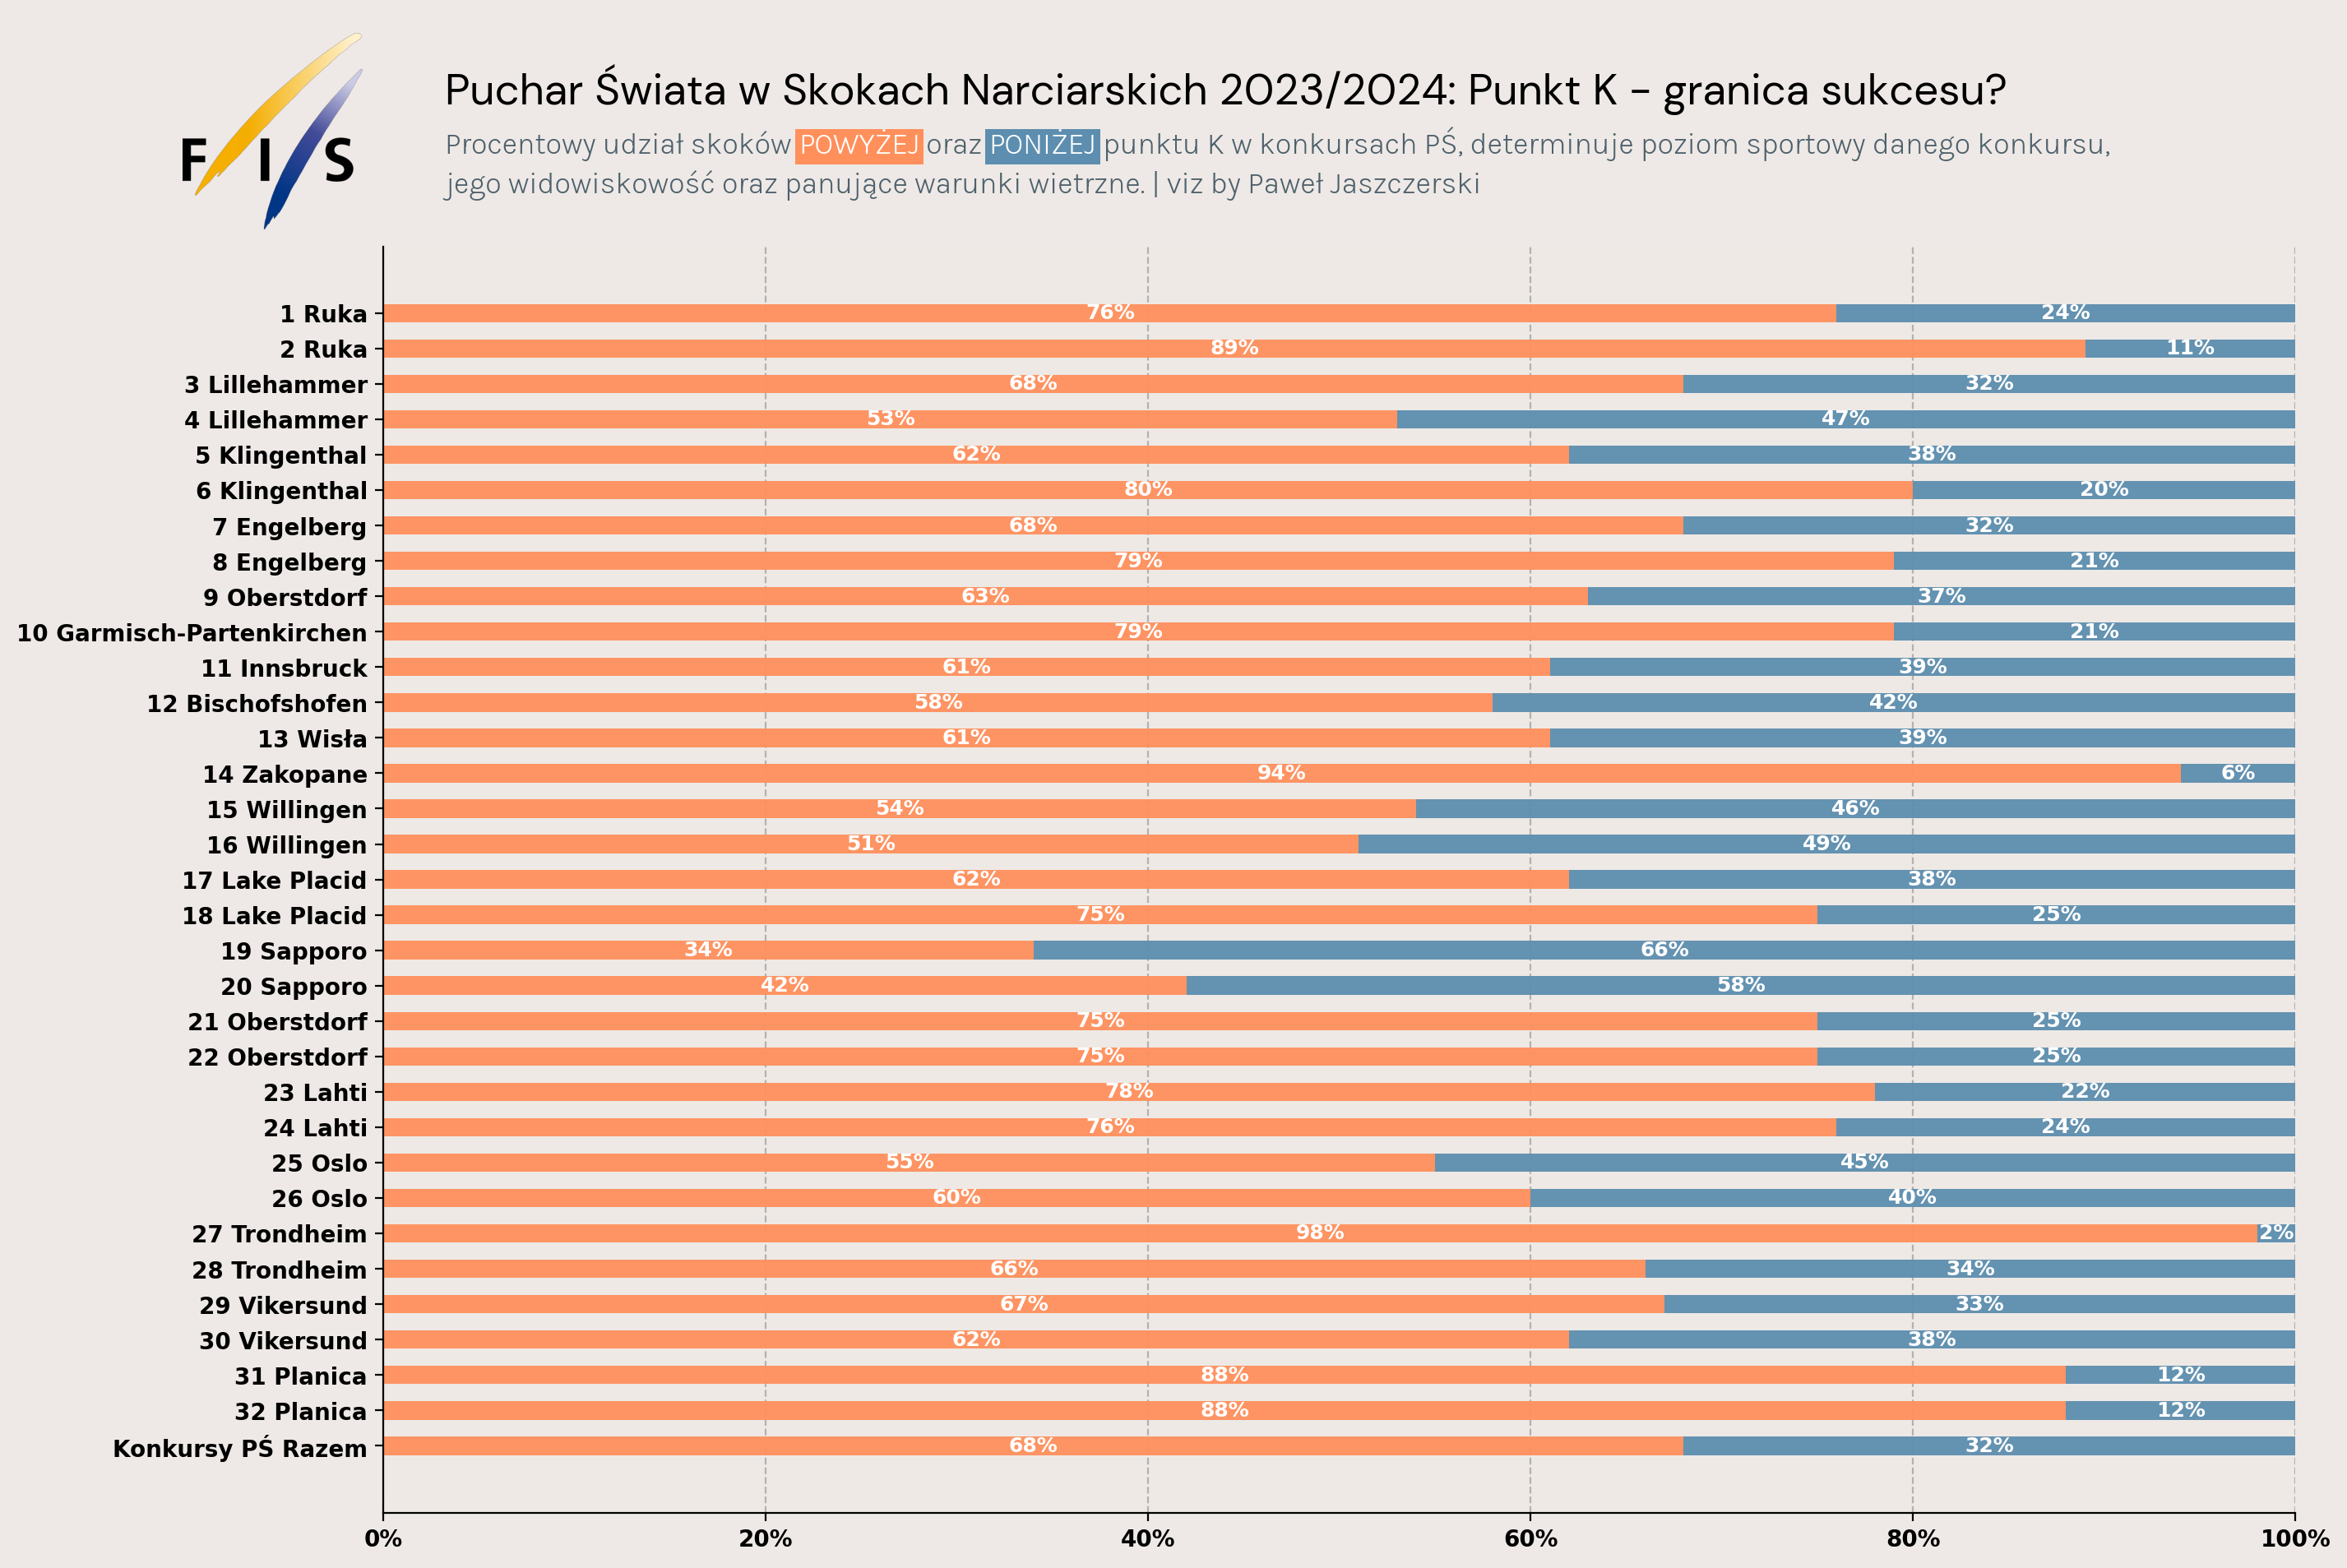

In [59]:
plot_horizontal_bar_chart_multiindex(df_ktotal)
plt.savefig(
	"k_point_viz.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)